In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn

In [3]:
#create column matrix
X = torch.linspace(1,50,50).reshape(-1,1)# -1 size ı bilmediğinde

In [5]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [6]:
torch.manual_seed(71)

In [7]:
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [8]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [9]:
y = 2*X + 1 + e #add some noise

In [10]:
y.shape

torch.Size([50, 1])

In [11]:
y.type

<function Tensor.type>

In [11]:
#we need to convert these back to numpy arrays in order to plot them out.

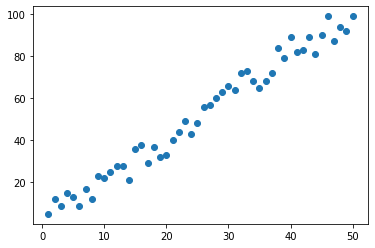

In [12]:
plt.scatter(X.numpy(),y.numpy())

#### We create a tensor X we did not pass requires_grad = True
#### This means that Y doesnt have a gradient function
#### So why that backward won't actually work since pi torch is not tracking operations. It doesnt actually know the relationship between the variable y and X.
#### So keep that in mind this is just a linear model right now. We are not keeping track of any gradient so far.

In [13]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [14]:
model

Linear(in_features=1, out_features=1, bias=True)

In [15]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [16]:
model(X)

tensor([[1.0698],
        [1.1758],
        [1.2817],
        [1.3877],
        [1.4937],
        [1.5997],
        [1.7056],
        [1.8116],
        [1.9176],
        [2.0236],
        [2.1296],
        [2.2355],
        [2.3415],
        [2.4475],
        [2.5535],
        [2.6594],
        [2.7654],
        [2.8714],
        [2.9774],
        [3.0834],
        [3.1893],
        [3.2953],
        [3.4013],
        [3.5073],
        [3.6132],
        [3.7192],
        [3.8252],
        [3.9312],
        [4.0372],
        [4.1431],
        [4.2491],
        [4.3551],
        [4.4611],
        [4.5671],
        [4.6730],
        [4.7790],
        [4.8850],
        [4.9910],
        [5.0969],
        [5.2029],
        [5.3089],
        [5.4149],
        [5.5209],
        [5.6268],
        [5.7328],
        [5.8388],
        [5.9448],
        [6.0507],
        [6.1567],
        [6.2627]], grad_fn=<AddmmBackward>)

In [12]:
class Model(nn.Module):
    
    def __init__(self,in_features,out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features,out_features) #Linear is a specific layer type.
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
        

In [13]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)


Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [19]:
for name,param in model.named_parameters():
    print(name, '\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [15]:
for param in model.named_parameters():
    print(param)

('linear.weight', Parameter containing:
tensor([[0.1060]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([0.9638], requires_grad=True))


#### Buraya kadar datamızla bir iş yapmadık. Yalnızca modelimizi oluşturduk. Bundan sonra datamızı kullanalım:

In [20]:
x = torch.tensor([2.0])
print(model.forward(x))
# y = wx + b: 0.10597*2 + 0.963

tensor([1.1758], grad_fn=<AddBackward0>)


In [27]:
x1 = np.linspace(0.0,50.0,50)

In [28]:
x1 # grafikteki x değerlerini oluşturduk.

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

#### Our network here which is essentially it hasn't really been trained on anything. It is basically just a guess of this random way and random bias. We haven't optimized lost function yet. It's just based off that first random weight and bias.

In [31]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [32]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

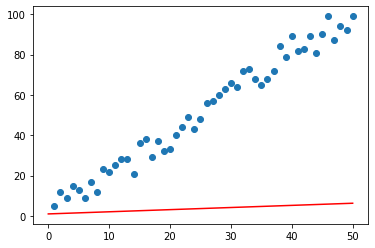

In [33]:
# first prediction
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [34]:
criterion = nn.MSELoss() # mean square error(the lost function) for continious data

In [35]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001) # There is our optimizer is:
#stochastic gradient descent

In [41]:
epochs = 50
losses = []

for i in range(epochs):
    
    # PREDICTING ON THE FORWARD PASS
    y_pred = model.forward(X)
    
    # CALCULATE OUR LOSS
    loss = criterion(y_pred,y)
    
    #RECORD THAT ERROR
    losses.append(loss)
    
    
    print(f"epoch {i+1} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    
    optimizer.zero_grad() # the gradients accumulate with every back propogation.
    #so to prevent compounding we need to reset the stored gradient for each epoch.
    
    loss.backward()
    optimizer.step() # updating our hyper parameters
          
    

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.5308837890625 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss: 830.3001708984375 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56573486328125 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.98923110961914 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.16238784790039 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.02911627292

#### So now after about 15 epochs your loss really isn't changing.

Text(0.5, 0, 'Epoch ')

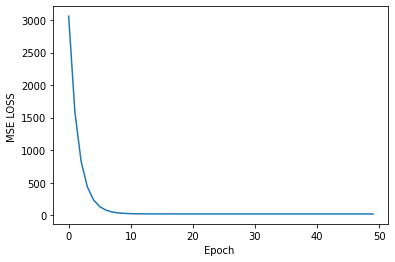

In [43]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE LOSS ')
plt.xlabel('Epoch ')

In [44]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [45]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

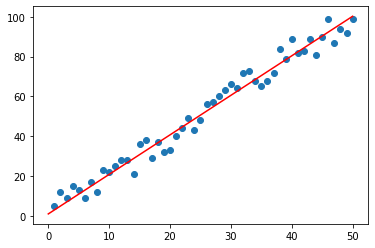

In [46]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x,predicted_y,'r')